### Monte Carlo Algorithm in Reinforcement Learning

Monte Carlo (MC) methods are a class of algorithms used in reinforcement learning (RL) to estimate value functions and optimize policies based on sampled episodes of experience. These methods rely on averaging sample returns to make predictions or decisions.

#### Key Concepts

1. **Episodes**:
    - Monte Carlo methods require complete episodes of interaction with the environment. An episode ends when a terminal state is reached.

2. **Returns**:
    - The return $ G_t $ is the cumulative discounted reward from time step $ t $:
      $$
      G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \dots
      $$
    - Here, $\gamma $ is the discount factor ($ 0 \leq \gamma \leq 1 $).

3. **Value Function Estimation**:
    - Monte Carlo methods estimate the value of a state $ V(s) $ or a state-action pair $ Q(s, a) $ by averaging the returns observed after visiting that state or state-action pair.

4. **Policy Improvement**:
    - Policies are improved by making them greedy with respect to the estimated value function or action-value function.

#### Types of Monte Carlo Methods

1. **First-Visit MC**:
    - Estimates the value of a state or state-action pair based on the first time it is visited in an episode.

2. **Every-Visit MC**:
    - Estimates the value by averaging the returns for every visit to a state or state-action pair in an episode.

#### Monte Carlo Control

Monte Carlo control combines policy evaluation and policy improvement to find the optimal policy. The steps are:

1. **Policy Evaluation**:
    - Use sampled episodes to estimate $ Q(s, a) $ for the current policy.

2. **Policy Improvement**:
    - Update the policy to be greedy with respect to $ Q(s, a) $:
      $$
      \pi(s) = \arg\max_a Q(s, a)
      $$

3. **Exploration**:
    - To ensure all state-action pairs are explored, an exploration strategy like $ \epsilon $-greedy is used.

#### Advantages

- Simple to implement.
- Does not require knowledge of the environment's dynamics (model-free).
- Works well with episodic tasks.

#### Limitations

- Requires complete episodes, which may not be feasible in some environments.
- High variance in estimates due to reliance on sampled episodes.
- Inefficient for large state or action spaces.

Monte Carlo methods are foundational in RL and are often used as a baseline for understanding more advanced algorithms like Temporal Difference (TD) learning and Deep Reinforcement Learning.

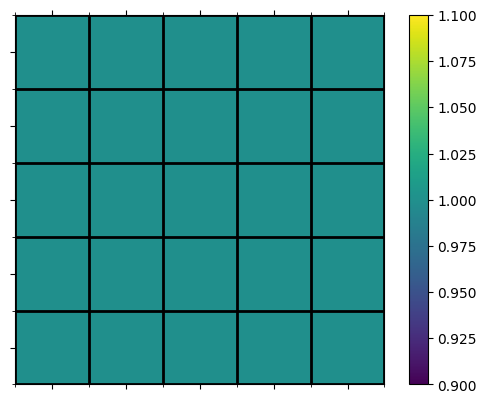

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def create_colored_grid(m, n, colors=None):
    # Create an MxN grid of 0s
    grid = np.zeros((m, n))

    # If specific colors are passed, assign them to the grid
    if colors.any():
        grid = np.array(colors).reshape((m, n))
    
    fig, ax = plt.subplots()

    # Display the grid as a color matrix
    cax = ax.matshow(grid, cmap='viridis', interpolation='nearest')

    # Optionally, add colorbar
    fig.colorbar(cax)

    # Set gridlines for better visibility
    ax.set_xticks(np.arange(0, n, 1))
    ax.set_yticks(np.arange(0, m, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks(np.arange(-.5, n, 1), minor=True)
    ax.set_yticks(np.arange(-.5, m, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    plt.show()

# Example usage
m, n = 5, 5  # Dimensions of the grid
colors = np.random.rand(m * n)  # Random colors for each box
create_colored_grid(m, n, colors)


In [6]:
colors = np.random.rand(m * n)  # Random colors for each box
colors.reshape((m, n))

array([[0.36404431, 0.56280507, 0.52313407, 0.38263097, 0.31595086],
       [0.12846307, 0.13150989, 0.60901198, 0.23578674, 0.36145253],
       [0.15546633, 0.7621213 , 0.79548674, 0.24218472, 0.79941033],
       [0.28466334, 0.56982295, 0.21594878, 0.7769372 , 0.0709152 ],
       [0.62418964, 0.30963429, 0.09812944, 0.32535829, 0.57856186]])

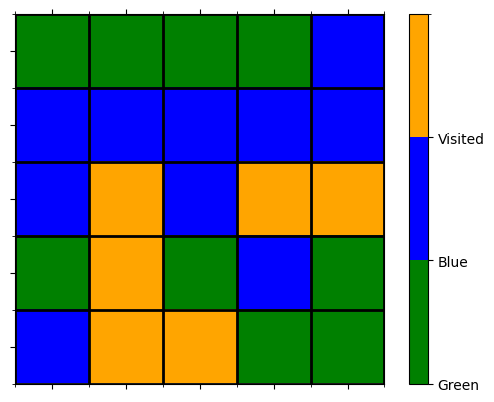

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

def create_colored_grid(m, n, color_map):
    # Create an MxN grid with random integers from 0 to 2 (representing 3 colors)
    grid = np.random.randint(0, 3, size=(m, n))

    grid[0, 0] = 0
    grid[0, 1] = 0
    
    fig, ax = plt.subplots()

    # Use a custom colormap with green, blue, and orange
    cmap = mcolors.ListedColormap(color_map)
    bounds = [0, 1, 2, 3]  # Boundaries for each color (0 -> green, 1 -> blue, 2 -> orange)
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    # Display the grid as a color matrix
    cax = ax.matshow(grid, cmap=cmap, norm=norm, interpolation='nearest')

    # Optionally, add a colorbar to show the color mapping
    cbar = fig.colorbar(cax, ticks=[0, 1, 2])
    cbar.ax.set_yticklabels(['Green', 'Blue', 'Visited'])

    # Set gridlines for better visibility
    ax.set_xticks(np.arange(0, n, 1))
    ax.set_yticks(np.arange(0, m, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks(np.arange(-.5, n, 1), minor=True)
    ax.set_yticks(np.arange(-.5, m, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    plt.show()

# Define the colors you want to use (green, blue, orange)
color_map = ['green', 'blue', 'orange']

# Example usage
m, n = 5, 5  # Dimensions of the grid
create_colored_grid(m, n, color_map)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



#cliff walking env
class environment:
    def __init__(self, nRow, nCol, nA):

        self.nRow = nRow
        self.nCol = nCol

        
        self.nS = nRow * nCol  # Number of states
        self.nA = nA  # Number of actions
        self.actions =[0, 1, 2, 3] # Actions: 0=left, 1=down, 2=right, 3=up
        self.V = np.zeros(self.nS)  # Value function
        self.Q = np.zeros((self.nS, self.nA)) # Q-value function
        self.state = 0  # Initial state

        self.grid  = np.zeros((nRow, nCol))  # Initialize the grid
        # Define the grid size
        self.grid[0, 1:(self.nCol - 1)] = 1
        # lets make bottom row except for first and last column as cliff
        

        

    def reset(self):
        self.state = 0  # Reset to initial state
        return self.state

    def step(self, action):

        # if state is top edge or left edge or right edge, up , left, right action should not be taken

        #top edge
        if ((self.nRow - 1) * self.nCol) <= self.state < self.nRow * self.nCol:
            if action == 3:
                return self.state, -100, True
        #left edge
        if self.state % self.nCol == 0:
            if action == 0:
                return self.state, -100, True
        #right edge
        if (self.state + 1) % self.nCol == 0:
            if action == 2:
                return self.state, -100, True
        #bottom edge
        if self.state < self.nCol:
            if action == 1:
                return self.state, -100, True
            


        # Define the transition and reward logic here
        if action == 0:
            self.state -= 1
        elif action == 1:
            self.state += self.nCol
        elif action == 2:
            self.state += 1
        elif action == 3:
            self.state -= self.nCol

        # if the state is in the cliff, return -100
        if self.state in range(1, self.nCol - 1):
            return self.state, -100, True
        
        if self.state == self.nCol - 1:
            # Reached the goal state
            return self.state, 100, True

        return self.state, -1, False  # Return next state, reward, and done flag
    

    def choose_action(env):
        # Define the action space
        # Randomly choose an action
        chosen_action = np.random.choice(4)
        
        return chosen_action


    def epsilon_greedy(env, state, epsilon=0.1):
        """
        Epsilon-greedy policy for action selection.

        Args:
            env: The environment object.
            state: The current state.
            Q: The Q-table (a dictionary or 2D array).
            epsilon: The probability of choosing a random action.

        Returns:
            The selected action.
        """
        if np.random.rand() < epsilon:
            # Choose a random action
            action = np.random.choice(env.actions)
        else:
            # Choose the action with the highest Q-value for the current state
            action = np.argmax(env.Q[state])

        return action


    def get_policy(env):
        policy = np.zeros(env.nS, dtype=int)  # Initialize policy array
        for state in range(env.nS):
            action = np.argmax(env.Q[state])
            policy[state] = action

        return policy


In [ ]:
#monte carlo with value funcation
def monte_carlo(env, num_episodes=1000, gamma=0.9):

    for episode in range(num_episodes):
        # Generate an episode
        state = env.reset()
        done = False
        rewards = []
        states_visited = []
        states_visited.append(state)

        while not done:
            action = env.epsilon_greedy(state)
            next_state, reward, done = env.step(action)

            env.Q[state, action] += reward

            print(next_state, reward, done)
            rewards.append(reward)
            states_visited.append(next_state)
        

        # Calculate the cumulative reward for each state
        G = 0
        cumulative_rewards = []
        for t in reversed(range(len(rewards))):
            G = rewards[t] + gamma * G
            cumulative_rewards.insert(0, G)
            state = states_visited[t]
            # Update the value function
            env.V[state] += (G - env.V[state]) / (episode + 1)

    return env.policy, env.V

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

#cliff walking env
class environment:
    def __init__(self, nRow, nCol, nA):

        self.nRow = nRow
        self.nCol = nCol

        
        self.nS = nRow * nCol  # Number of states
        self.nA = nA  # Number of actions
        self.actions =[0, 1, 2, 3] # Actions: 0=left, 1=down, 2=right, 3=up
        self.V = np.zeros(self.nS)  # Value function
        self.Q = np.zeros((self.nS, self.nA)) # Q-value function
        self.state = 0  # Initial state

        self.grid  = np.zeros((nRow, nCol))  # Initialize the grid
        # Define the grid size
        self.grid[0, 1:(self.nCol - 1)] = 1
        # lets make bottom row except for first and last column as cliff
        

        

    def reset(self):
        self.state = 0  # Reset to initial state
        return self.state

    def step(self, action):

        # if state is top edge or left edge or right edge, up , left, right action should not be taken

        #top edge
        if ((self.nRow - 1) * self.nCol) <= self.state < self.nRow * self.nCol:
            if action == 3:
                return self.state, -100, True
        #left edge
        if self.state % self.nCol == 0:
            if action == 0:
                return self.state, -100, True
        #right edge
        if (self.state + 1) % self.nCol == 0:
            if action == 2:
                return self.state, -100, True
        #bottom edge
        if self.state < self.nCol:
            if action == 1:
                return self.state, -100, True
            


        # Define the transition and reward logic here
        if action == 0:
            self.state -= 1
        elif action == 1:
            self.state += self.nCol
        elif action == 2:
            self.state += 1
        elif action == 3:
            self.state -= self.nCol

        # if the state is in the cliff, return -100
        if self.state in range(1, self.nCol - 1):
            return self.state, -100, True
        
        if self.state == self.nCol - 1:
            # Reached the goal state
            return self.state, 100, True

        return self.state, -1, False  # Return next state, reward, and done flag
    

    def choose_action(env):
        # Define the action space
        # Randomly choose an action
        chosen_action = np.random.choice(4)
        
        return chosen_action


    def epsilon_greedy(env, state, epsilon=0.1):
        """
        Epsilon-greedy policy for action selection.

        Args:
            env: The environment object.
            state: The current state.
            Q: The Q-table (a dictionary or 2D array).
            epsilon: The probability of choosing a random action.

        Returns:
            The selected action.
        """
        if np.random.rand() < epsilon:
            # Choose a random action
            action = np.random.choice(env.actions)
        else:
            # Choose the action with the highest Q-value for the current state
            action = np.argmax(env.Q[state])

        return action


    def get_policy(env):
        policy = np.zeros(env.nS, dtype=int)  # Initialize policy array
        for state in range(env.nS):
            action = np.argmax(env.Q[state])
            policy[state] = action

        return policy



#monte carlo with value funcation
def monte_carlo(env, num_episodes=1000, gamma=0.9):

    for episode in range(num_episodes):
        # Generate an episode
        env.reset()
        done = False
        rewards = []
        states_visited = []
        states_visited.append(env.state)

        while not done:
            action = env.epsilon_greedy(env.state)
            next_state, reward, done = env.step(action)

            env.Q[env.state, action] += reward

            print(next_state, reward, done, action)
            rewards.append(reward)
            states_visited.append(next_state)
        

        # Calculate the cumulative reward for each state
        G = 0
        cumulative_rewards = []
        for t in reversed(range(len(rewards))):
            G = rewards[t] + gamma * G
            cumulative_rewards.insert(0, G)
            state = states_visited[t]
            # Update the value function
            env.V[state] += (G - env.V[state]) / (episode + 1)

    return env.get_policy(), env.V

Cliff_walker = environment(4, 12, 4)
policy, V = monte_carlo(Cliff_walker, num_episodes=1000, gamma=0.9)
print("Final Policy:", policy)
print("Final Value Function:", V.reshape(4, 12))

0 -100 True 0
0 -100 True 1
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
-12 -1 False 3
-12 -100 True 0
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
0 -100 True 0
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
0 -100 True 0
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
-12 -1 False 3
-12 -100 True 1
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
0 -100 True 0
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
1 -100 True 2
